In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import fashion_mnist


In [3]:
# data splitting
(x_train_full,y_train_full),(x_test,y_test) = fashion_mnist.load_data()

In [4]:
x_train_full.dtype

dtype('uint8')

In [5]:
#scaling the data
x_valid,x_train = x_train_full[:5000]/255.0,x_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

In [6]:
x_train.shape

(55000, 28, 28)

In [7]:
y_train.shape

(55000,)

In [8]:
y_valid.shape

(5000,)

In [7]:
x_valid.shape

(5000, 28, 28)

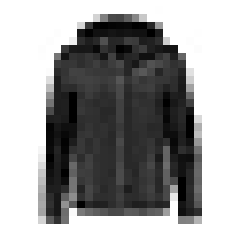

In [9]:
plt.imshow(x_train[0] ,cmap="binary")
plt.axis("off")
plt.show()

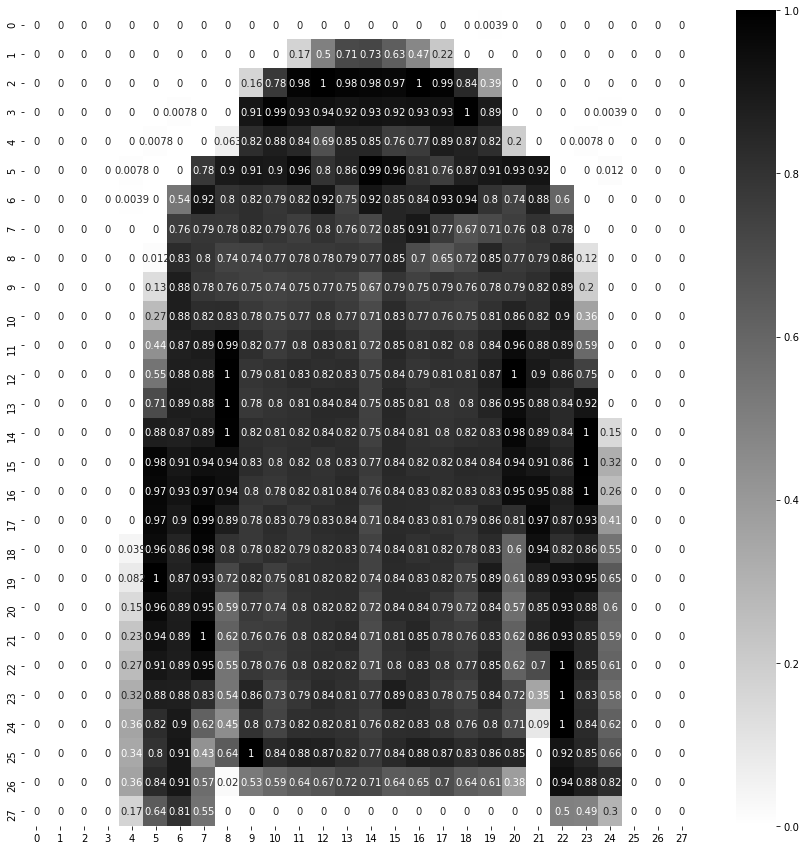

In [10]:
#heatmap
plt.figure(figsize=(15,15))
sns.heatmap(x_train[0], cmap="binary", annot=True)
plt.show()

In [11]:
y_train[0]

4

In [12]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

# Create model

In [13]:
Layers =[tf.keras.layers.Flatten(input_shape=[28,28]),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dense(100, activation = 'relu'),
        tf.keras.layers.Dense(10, activation ='softmax')]

In [14]:
model = tf.keras.models.Sequential(Layers)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
784*300+300 + 300*100+100 + 100*10+ 10 

266610

In [17]:
LOSS = 'sparse_categorical_crossentropy',
OPTIMIZER = 'sgd'

model.compile(loss=LOSS, optimizer= OPTIMIZER,metrics = 'accuracy')

In [18]:
EPOCHS = 100
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir="logs_for_ass2")
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model_mnistfashion.h5",save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 5,restore_best_weights=True)
CALLBACKS = [tensorboard_cb,checkpoint_cb,early_stopping_cb]

In [19]:
x_valid.shape

(5000, 28, 28)

In [20]:
y_valid.shape

(5000,)

In [21]:
x_train.shape

(55000, 28, 28)

In [22]:
y_train.shape

(55000,)

In [23]:
history = model.fit(x_train, y_train, epochs=EPOCHS, validation_data=(x_valid, y_valid), callbacks= CALLBACKS)

Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7119 - accuracy: 0.7664 - val_loss: 0.6107 - val_accuracy: 0.7696
Epoch 2/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4834 - accuracy: 0.8320 - val_loss: 0.4426 - val_accuracy: 0.8496
Epoch 3/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4378 - accuracy: 0.8460 - val_loss: 0.4649 - val_accuracy: 0.8316
Epoch 4/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4116 - accuracy: 0.8559 - val_loss: 0.4197 - val_accuracy: 0.8484: 0s - loss:
Epoch 5/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3920 - accuracy: 0.8621 - val_loss: 0.3951 - val_accuracy: 0.8600
Epoch 6/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3769 - accuracy: 0.8674 - val_loss: 0.3889 - val_accuracy: 0.8652
Epoch 7/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3640 - accuracy: 0.8711 - val_loss: 0.3

<AxesSubplot:>

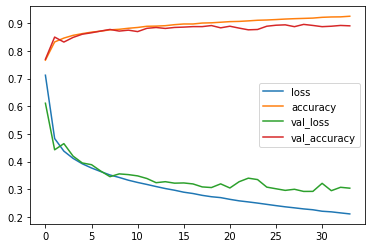

In [26]:
pd.DataFrame(history.history).plot()

In [29]:
import os
import time

def save_model(model_dir="Fashion_mnist"):
    fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
    os.makedirs(model_dir, exist_ok =True)
    model_path = os.path.join(model_dir, fileName)
    print(f"Saving model{fileName} at : {model_path}")
    return model_path


In [30]:
unique_path = save_model()

Saving modellog_2021_05_30_01_31_20 at : Fashion_mnist\log_2021_05_30_01_31_20


In [31]:
tf.keras.models.save_model(model,unique_path)

INFO:tensorflow:Assets written to: Fashion_mnist\log_2021_05_30_01_31_20\assets


In [32]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 63.4918 - accuracy: 0.8459A: 0s - loss: 63.4685 - accuracy: 0.846 - ETA: 0s - loss: 63.7309 - accuracy: 0.845


[63.49178695678711, 0.8458999991416931]

Actual Image Predicted


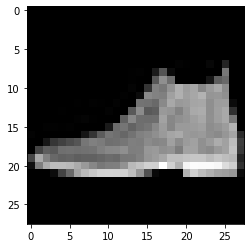

Actual Output Value = 9 
Actual Image Predicted


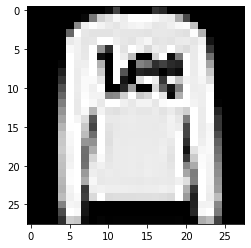

Actual Output Value = 2 
Actual Image Predicted


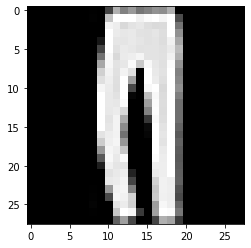

Actual Output Value = 1 
Actual Image Predicted


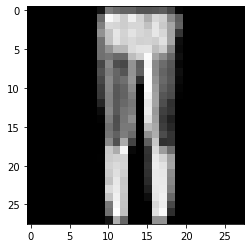

Actual Output Value = 1 
Actual Image Predicted


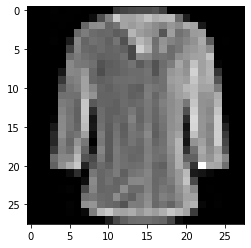

Actual Output Value = 6 
Actual Image Predicted


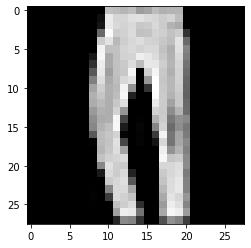

Actual Output Value = 1 
Actual Image Predicted


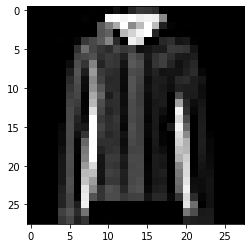

Actual Output Value = 4 
Actual Image Predicted


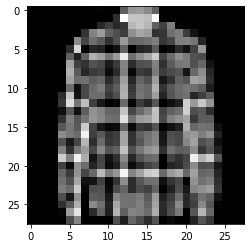

Actual Output Value = 6 
Actual Image Predicted


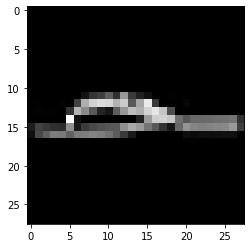

Actual Output Value = 5 
Actual Image Predicted


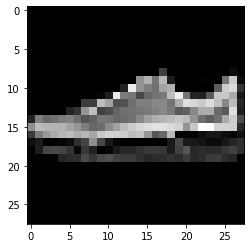

Actual Output Value = 7 


In [33]:
for i in range(0,10):
    print("Actual Image Predicted")
    plt.imshow(x_test[i], cmap='gray')
    plt.show()
    print(f"Actual Output Value = {y_test[i]} ")